In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_feature 에 예측변수 모음 업로드
df_target 에 결과변수 업로드

In [2]:
df_feature = pd.read_csv("../예비 - 변수선택용 proact 데이터/p_features_combined_without_nan_final.csv")
df_target = pd.read_csv("../예비 - 변수선택용 proact 데이터/p_ALSFRS_slope.csv")

df_target 에 해당하는 ID 만 df_feature 에서 추출

In [3]:
extent = list(df_target["SubjectID"].unique())
df_feature.query("SubjectID == {0}".format(extent), inplace=True)


In [4]:
p_fin = pd.DataFrame(columns=['SubjectID'])
static_list = [df_feature, df_target]
for i in static_list :
    df = i
    p_fin = p_fin.merge(df, on='SubjectID', how='outer')
    
    
p_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 270
Data columns (total 49 columns):
Unnamed: 0            271 non-null int64
SubjectID             271 non-null int64
Age                   271 non-null float64
Gender                271 non-null object
Race                  271 non-null object
family_ALS_hist       271 non-null object
diag_delta            271 non-null float64
onset_delta           271 non-null float64
onset_site            271 non-null object
if_use_Riluzole       271 non-null object
treatment_group       271 non-null object
alsfrs_total_slope    271 non-null float64
mean_alsfrs_total     271 non-null float64
min_alsfrs_total      271 non-null float64
max_alsfrs_total      271 non-null float64
fvc_slope             271 non-null float64
fvc_mean              271 non-null float64
fvc_min               271 non-null float64
fvc_max               271 non-null float64
svc_slope             271 non-null float64
svc_mean              271 non-null float64
sv

In [5]:
p_fin = p_fin.drop(columns = "Unnamed: 0")
p_fin = p_fin.drop(columns = "SubjectID")

p_fin.head()

,Age,Gender,Race,family_ALS_hist,diag_delta,onset_delta,onset_site,if_use_Riluzole,treatment_group,alsfrs_total_slope,...,bp_s_slope,pulse_slope,resp_rate_slope,temp_slope,mean_weight,max_weight,min_weight,slope_weight,mean_BMI,ALSFRS_slope
0,55.0,F,White,N,-59.0,-245.0,Limb,Yes,Placebo,-1.309947e-01,...,-0.032618,0.031483,0.010464,-0.001051,78.266003,79.114465,77.307966,-0.010689,0.002663,-1.086310
1,47.0,M,White,N,-319.0,-729.0,Bulbar,Yes,Placebo,-2.584885e-02,...,-0.032618,0.031483,0.010464,-0.001051,78.266003,79.114465,77.307966,-0.010689,0.002663,-0.228697
2,67.0,M,White,N,-98.0,-921.0,Limb,Yes,Active,2.715836e-16,...,0.588889,-0.244444,-0.022222,-0.004444,94.366667,95.300000,93.000000,-0.048649,0.003009,-1.303571
3,59.0,M,White,N,-414.0,-612.0,Limb,Yes,Active,-7.142857e-02,...,0.038961,-0.077922,-0.051948,-0.001051,89.966667,91.200000,88.500000,0.040476,0.002722,-0.649466
4,42.0,M,White,N,-159.0,-400.0,Other,Yes,Placebo,-5.762712e-02,...,0.095890,0.589041,-0.136986,-0.005479,76.250000,77.000000,74.000000,-0.041096,0.002514,-1.497790


In [6]:
X = p_fin.copy()
y = X.pop("ALSFRS_slope")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
  

# All discrete features should now have integer dtypes (double-check this before using MI!)

discrete_features = X.dtypes == "int64"

In [7]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3] # show a few features with their MI scores

onset_delta        0.099952
fvc_max            0.080284
fvc_min            0.041144
fvc_slope          0.031801
mean_temp          0.020507
diag_delta         0.014931
bp_d_slope         0.008651
Gender             0.005823
Race               0.003033
mean_bp_s          0.000812
treatment_group    0.000000
mean_BMI           0.000000
svc_max            0.000000
min_bp_s           0.000000
temp_slope         0.000000
max_bp_d           0.000000
Name: MI Scores, dtype: float64

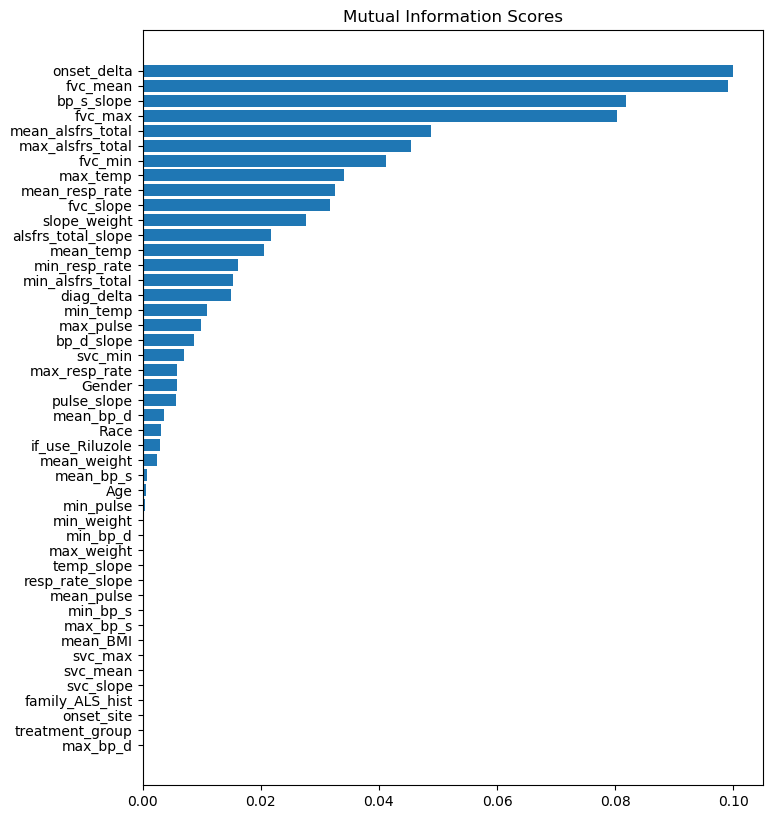

In [9]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_scores)